In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial

In [2]:
fair_probs = torch.ones([6]) / 6

In [3]:
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [4]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 0., 1.])

In [5]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [6]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [7]:
multinomial.Multinomial(100000000, fair_probs).sample()

tensor([16664042., 16670783., 16665637., 16671630., 16666212., 16661696.])

In [8]:
_ / 100000000

tensor([0.1666, 0.1667, 0.1667, 0.1667, 0.1667, 0.1666])

In [9]:
import d2l

In [24]:
counts = multinomial.Multinomial(20, fair_probs).sample((1000,))

In [11]:
counts, counts.shape

(tensor([[2., 5., 1., 4., 4., 4.],
         [8., 2., 2., 3., 1., 4.],
         [3., 3., 5., 4., 4., 1.],
         ...,
         [2., 4., 2., 2., 4., 6.],
         [4., 2., 2., 5., 3., 4.],
         [3., 4., 2., 6., 2., 3.]]),
 torch.Size([50000, 6]))

In [25]:
cum_counts = counts.cumsum(dim=0)

In [13]:
cum_counts, cum_counts.shape

(tensor([[2.0000e+00, 5.0000e+00, 1.0000e+00, 4.0000e+00, 4.0000e+00, 4.0000e+00],
         [1.0000e+01, 7.0000e+00, 3.0000e+00, 7.0000e+00, 5.0000e+00, 8.0000e+00],
         [1.3000e+01, 1.0000e+01, 8.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00],
         ...,
         [1.6721e+05, 1.6629e+05, 1.6644e+05, 1.6675e+05, 1.6681e+05, 1.6646e+05],
         [1.6722e+05, 1.6629e+05, 1.6644e+05, 1.6675e+05, 1.6682e+05, 1.6646e+05],
         [1.6722e+05, 1.6629e+05, 1.6644e+05, 1.6676e+05, 1.6682e+05, 1.6646e+05]]),
 torch.Size([50000, 6]))

In [26]:
cum_counts.sum(dim=1, keepdims=True)

tensor([[   20.],
        [   40.],
        [   60.],
        [   80.],
        [  100.],
        [  120.],
        [  140.],
        [  160.],
        [  180.],
        [  200.],
        [  220.],
        [  240.],
        [  260.],
        [  280.],
        [  300.],
        [  320.],
        [  340.],
        [  360.],
        [  380.],
        [  400.],
        [  420.],
        [  440.],
        [  460.],
        [  480.],
        [  500.],
        [  520.],
        [  540.],
        [  560.],
        [  580.],
        [  600.],
        [  620.],
        [  640.],
        [  660.],
        [  680.],
        [  700.],
        [  720.],
        [  740.],
        [  760.],
        [  780.],
        [  800.],
        [  820.],
        [  840.],
        [  860.],
        [  880.],
        [  900.],
        [  920.],
        [  940.],
        [  960.],
        [  980.],
        [ 1000.],
        [ 1020.],
        [ 1040.],
        [ 1060.],
        [ 1080.],
        [ 1100.],
        [ 

In [27]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

In [16]:
estimates

tensor([[0.1000, 0.2500, 0.0500, 0.2000, 0.2000, 0.2000],
        [0.2500, 0.1750, 0.0750, 0.1750, 0.1250, 0.2000],
        [0.2167, 0.1667, 0.1333, 0.1833, 0.1500, 0.1500],
        ...,
        [0.1672, 0.1663, 0.1664, 0.1668, 0.1668, 0.1665],
        [0.1672, 0.1663, 0.1664, 0.1668, 0.1668, 0.1665],
        [0.1672, 0.1663, 0.1664, 0.1668, 0.1668, 0.1665]])

In [28]:
d2l.set_figsize((12, 9))

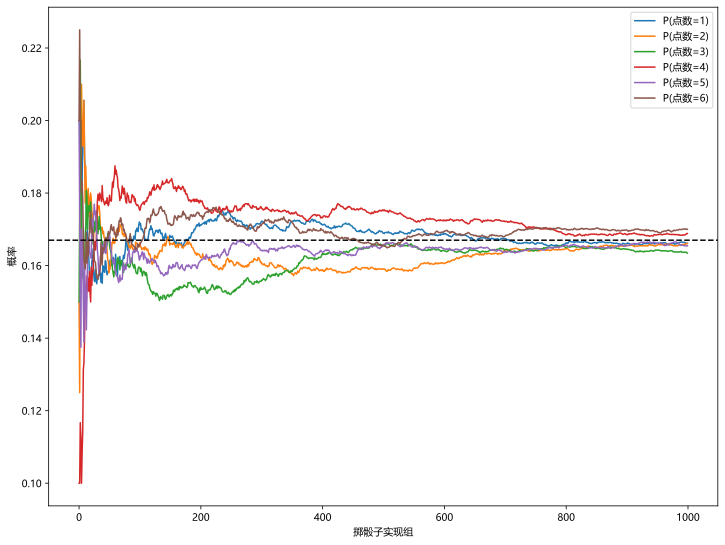

In [29]:
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=(f"P(点数={i+1})"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('掷骰子实现组')
d2l.plt.gca().set_ylabel('概率')
d2l.plt.legend()